#1) Objectives

Credit scoring adalah sistem yang diterapkan oleh lembaga keuangan atau bank untuk dapat menentukan kelayakan nasabah dalam pemberian pinjaman secara obyektif dengan melakukan analisis terhadap profil nasabah. Semakin lengkap dan tepat data yang dianalisis, semakin baik pula bank dalam menetapkan kelayakan nasabah.

Dari sisi bank 

Dengan bantuan machine learning, proses pekerjaan credit scoring yang tadinya dikerjakan secara manual oleh manusia atau dalam hal ini oleh credit analyst, akan menjadi efisien/hemat waktu dan dapat memberikan hasil evaluasi credit scoring nasabah yang lebih banyak serta memperkecil bias. 
Analisis machine learning yang tepat juga diharapkan menghasilkan prediksi profil peminjam yang berpotensi melunasi pinjaman dengan lancar.

Dari sisi nasabah 

Nasabah akan mendapatkan kepuasan karena lebih cepat mendapatkan informasi terkait kelayakan peminjamannya karena berkurangnya waktu tunggu.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier


#2) Load Dataset and Dataset Information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
applications_df = pd.read_csv('/content/drive/MyDrive/Source Credit Scoring - Seanny/application_record.csv')
credit_record_df = pd.read_csv('/content/drive/MyDrive/Source Credit Scoring - Seanny/credit_record_mod1.csv',sep = ';')

Data Description:

**Application**

- ID	: Client number	
- CODE_GENDER : Gender	
- FLAG_OWN_CAR : Is there a car	
- FLAG_OWN_REALTY ; Is there a property	
- CNT_CHILDREN : Number of children	
- AMT_INCOME_TOTAL : Annual income	
- NAME_INCOME_TYPE	: Income category	
- NAME_EDUCATION_TYPE :	Education level	
- NAME_FAMILY_STATUS	: Marital status	
- NAME_HOUSING_TYPE	: Way of living	
- DAYS_BIRTH	: Birthday	Count backwards from current day (0), -1 means yesterday
- DAYS_EMPLOYED	: Start date of employment	Count backwards from current day(0). If positive, it means - - the person currently unemployed.
- FLAG_MOBIL	: Is there a mobile phone	
- FLAG_WORK_PHONE	: Is there a work phone	
- FLAG_PHONE	: Is there a phone	
- FLAG_EMAIL	: Is there an email	
- OCCUPATION_TYPE	: Occupation	
- CNT_FAM_MEMBERS	:Family size

**Credit**

- ID : Client number	
- STATUS : Status	
    - 0: good credit
    - 1: bad credit
 


## 2.1) Applications Dataset

In [ ]:
applications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
applications_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [ ]:
applications_df.shape

(438557, 18)

Identify Missing Values

In [ ]:
applications_df.isna()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0       False        False         False            False         False   
1       False        False         False            False         False   
2       False        False         False            False         False   
3       False        False         False            False         False   
4       False        False         False            False         False   
...       ...          ...           ...              ...           ...   
438552  False        False         False            False         False   
438553  False        False         False            False         False   
438554  False        False         False            False         False   
438555  False        False         False            False         False   
438556  False        False         False            False         False   

        AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                  False             False                False   
1                  False             False                False   
2                  False             False                False   
3                  False             False                False   
4                  False             False                False   
...                  ...               ...                  ...   
438552             False             False                False   
438553             False             False                False   
438554             False             False                False   
438555             False             False                False   
438556             False             False                False   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                    False              False       False          False   
1                    False              False       False          False   
2                    False              False       False          False   
3                    False              False       False          False   
4                    False              False       False          False   
...                    ...                ...         ...            ...   
438552               False              False       False          False   
438553               False              False       False          False   
438554               False              False       False          False   
438555               False              False       False          False   
438556               False              False       False          False   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0            False            False       False       False             True   
1            False            False       False       False             True   
2            False            False       False       False            False   
3            False            False       False       False            False   
4            False            False       False       False            False   
...            ...              ...         ...         ...              ...   
438552       False            False       False       False             True   
438553       False            False       False       False            False   
438554       False            False       False       False            False   
438555       False            False       False       False             True   
438556       False            False       False       False            False   

        CNT_FAM_MEMBERS  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
438552            False  
438553            False  
438554            False  
438555            False  
438556            False  

[438557 rows x 18 columns]

In [ ]:
# Terdapat missing values pada kolom OCCUPATION_TYPE sebanyak 30% sehingga kita drop datanya (row wise)
(438557-304354)/438557 

0.30601039317580153

Handling Missing Values

In [ ]:
applications_df.dropna(subset=['OCCUPATION_TYPE'],inplace=True)

In [ ]:
# Check after dropna
applications_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304354 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   304354 non-null  int64  
 1   CODE_GENDER          304354 non-null  object 
 2   FLAG_OWN_CAR         304354 non-null  object 
 3   FLAG_OWN_REALTY      304354 non-null  object 
 4   CNT_CHILDREN         304354 non-null  int64  
 5   AMT_INCOME_TOTAL     304354 non-null  float64
 6   NAME_INCOME_TYPE     304354 non-null  object 
 7   NAME_EDUCATION_TYPE  304354 non-null  object 
 8   NAME_FAMILY_STATUS   304354 non-null  object 
 9   NAME_HOUSING_TYPE    304354 non-null  object 
 10  DAYS_BIRTH           304354 non-null  int64  
 11  DAYS_EMPLOYED        304354 non-null  int64  
 12  FLAG_MOBIL           304354 non-null  int64  
 13  FLAG_WORK_PHONE      304354 non-null  int64  
 14  FLAG_PHONE           304354 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
applications_df.shape

(304354, 18)


Identify duplicate entries/rows

In [ ]:
applications_df[applications_df.duplicated(keep=False)]

Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS]
Index: []

Tidak ada data duplikasi pada dataset applications

Cek nilai unique

In [ ]:
applications_df.nunique().sort_values(ascending=False)

ID                     304331
DAYS_BIRTH              14158
DAYS_EMPLOYED            8962
AMT_INCOME_TOTAL          645
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            12
CNT_CHILDREN               11
NAME_HOUSING_TYPE           6
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
CODE_GENDER                 2
FLAG_OWN_REALTY             2
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
FLAG_OWN_CAR                2
FLAG_MOBIL                  1
dtype: int64

Drop kolom FLAG_MOBIL

In [ ]:
applications_df.drop( columns = ['FLAG_MOBIL'],inplace=True)

In [ ]:
# Check after drop flag_mobil
applications_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304354 entries, 2 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   304354 non-null  int64  
 1   CODE_GENDER          304354 non-null  object 
 2   FLAG_OWN_CAR         304354 non-null  object 
 3   FLAG_OWN_REALTY      304354 non-null  object 
 4   CNT_CHILDREN         304354 non-null  int64  
 5   AMT_INCOME_TOTAL     304354 non-null  float64
 6   NAME_INCOME_TYPE     304354 non-null  object 
 7   NAME_EDUCATION_TYPE  304354 non-null  object 
 8   NAME_FAMILY_STATUS   304354 non-null  object 
 9   NAME_HOUSING_TYPE    304354 non-null  object 
 10  DAYS_BIRTH           304354 non-null  int64  
 11  DAYS_EMPLOYED        304354 non-null  int64  
 12  FLAG_WORK_PHONE      304354 non-null  int64  
 13  FLAG_PHONE           304354 non-null  int64  
 14  FLAG_EMAIL           304354 non-null  int64  
 15  OCCUPATION_TYPE  

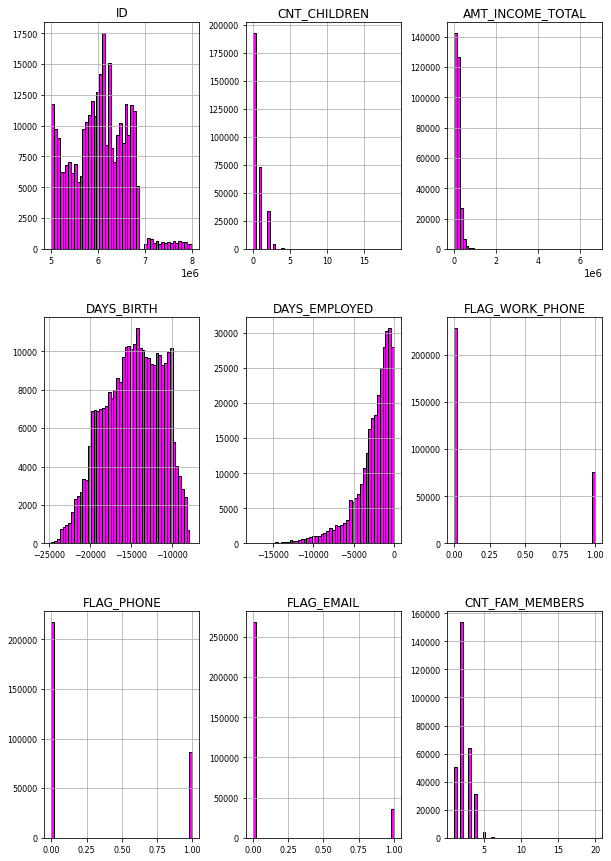

In [ ]:
# Plot the distribution 
fig_ = applications_df.hist(
    figsize=(10, 15), 
    bins=50, 
    color="magenta", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

In [ ]:
applications_df.shape

(304354, 17)

## 2.2) Credit Record Dataset

In [ ]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839345 entries, 0 to 839344
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   ID      839345 non-null  int64
 1   STATUS  839345 non-null  int64
dtypes: int64(2)
memory usage: 12.8 MB


In [ ]:
credit_record_df.head()

ID  STATUS
0  5001711       0
1  5001711       0
2  5001711       0
3  5001712       0
4  5001712       0

In [ ]:
credit_record_df.shape

(839345, 2)

Identify Missing Values

In [ ]:
credit_record_df.isna()

ID  STATUS
0       False   False
1       False   False
2       False   False
3       False   False
4       False   False
...       ...     ...
839340  False   False
839341  False   False
839342  False   False
839343  False   False
839344  False   False

[839345 rows x 2 columns]

Tidak ada missing values pada dataset credit record


Identify duplicate entries/rows

In [ ]:
credit_record_df[credit_record_df.duplicated(keep=False)]

ID  STATUS
0       5001711       0
1       5001711       0
2       5001711       0
3       5001712       0
4       5001712       0
...         ...     ...
839340  5150487       0
839341  5150487       0
839342  5150487       0
839343  5150487       0
839344  5150487       0

[834970 rows x 2 columns]

In [ ]:
credit_record_df.drop_duplicates()

ID  STATUS
0       5001711       0
3       5001712       0
22      5001717       0
44      5001718       0
52      5001718       1
...         ...     ...
839256  5150480       0
839282  5150482       0
839300  5150484       0
839313  5150485       0
839315  5150487       0

[46768 rows x 2 columns]

Cek nilai unique/variabel dengan nilai konstan

In [ ]:
credit_record_df.nunique().sort_values(ascending=False)

ID        41449
STATUS        2
dtype: int64

Kesimpulan : Tidak ada variabel bernilai konstan pada dataset credit record

In [ ]:
credit_record_df.STATUS.value_counts()

0    825151
1     14194
Name: STATUS, dtype: int64

## 2.3) Merge Datasets

In [ ]:
merged_data = pd.merge(applications_df, credit_record_df, how = "inner" , on='ID')

# 3) Data Preprocessing

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435500 entries, 0 to 435499
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   435500 non-null  int64  
 1   CODE_GENDER          435500 non-null  object 
 2   FLAG_OWN_CAR         435500 non-null  object 
 3   FLAG_OWN_REALTY      435500 non-null  object 
 4   CNT_CHILDREN         435500 non-null  int64  
 5   AMT_INCOME_TOTAL     435500 non-null  float64
 6   NAME_INCOME_TYPE     435500 non-null  object 
 7   NAME_EDUCATION_TYPE  435500 non-null  object 
 8   NAME_FAMILY_STATUS   435500 non-null  object 
 9   NAME_HOUSING_TYPE    435500 non-null  object 
 10  DAYS_BIRTH           435500 non-null  int64  
 11  DAYS_EMPLOYED        435500 non-null  int64  
 12  FLAG_WORK_PHONE      435500 non-null  int64  
 13  FLAG_PHONE           435500 non-null  int64  
 14  FLAG_EMAIL           435500 non-null  int64  
 15  OCCUPATION_TYPE  

In [ ]:
merged_data.drop(columns = ['ID'],inplace=True)

In [ ]:
merged_data.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  435500.000000      4.355000e+05  435500.000000  435500.000000   
mean        0.504850      1.963296e+05  -15039.256746   -2765.434227   
std         0.784829      1.045286e+05    3422.446586    2405.275077   
min         0.000000      2.700000e+04  -24611.000000  -15713.000000   
25%         0.000000      1.350000e+05  -17615.000000   -3661.000000   
50%         0.000000      1.800000e+05  -14854.000000   -2134.000000   
75%         1.000000      2.250000e+05  -12242.000000   -1051.000000   
max        19.000000      1.575000e+06   -7705.000000     -17.000000   

       FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count    435500.000000  435500.000000  435500.000000    435500.000000   
mean          0.277936       0.294900       0.102152         2.299208   
std           0.447982       0.455998       0.302848         0.936247   
min           0.000000       0.000000       0.000000         1.000000   
25%           0.000000       0.000000       0.000000         2.000000   
50%           0.000000       0.000000       0.000000         2.000000   
75%           1.000000       1.000000       0.000000         3.000000   
max           1.000000       1.000000       1.000000        20.000000   

              STATUS  
count  435500.000000  
mean        0.019254  
std         0.137416  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [ ]:
merged_data.shape

(435500, 17)

## 3.1) Handling Outliers

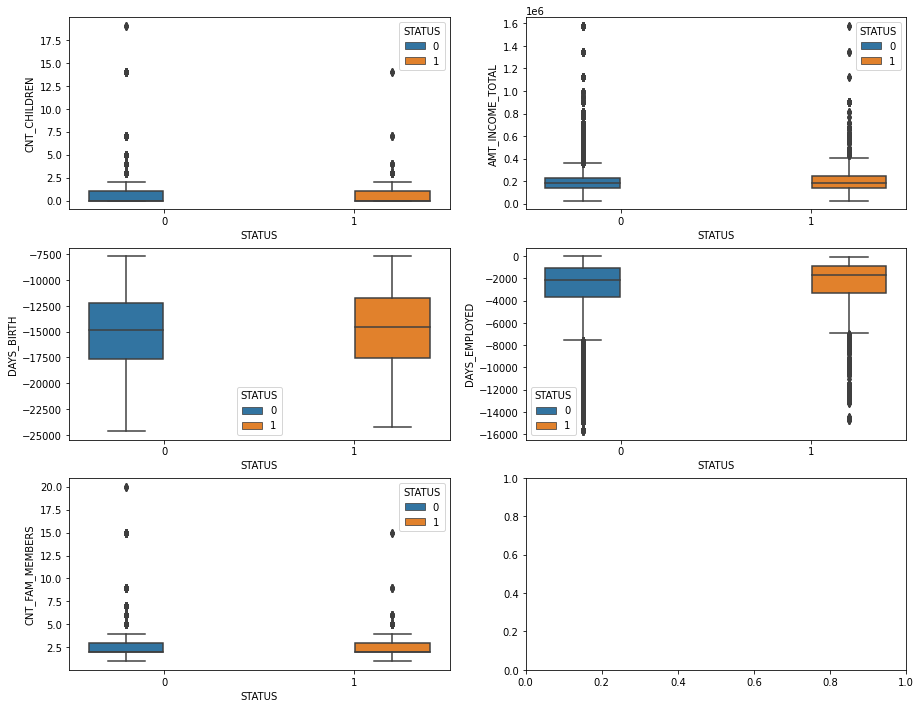

In [ ]:
fig,axarr = plt.subplots (3,2, figsize = (15,12))
sns.boxplot(y ='CNT_CHILDREN', x= 'STATUS', hue ='STATUS',data = merged_data, ax=axarr[0][0])
sns.boxplot(y ='AMT_INCOME_TOTAL', x= 'STATUS', hue ='STATUS',data = merged_data, ax=axarr[0][1])
sns.boxplot(y ='DAYS_BIRTH', x= 'STATUS', hue ='STATUS',data = merged_data, ax=axarr[1][0])
sns.boxplot(y ='DAYS_EMPLOYED', x= 'STATUS', hue ='STATUS',data = merged_data, ax=axarr[1][1])
sns.boxplot(y ='CNT_FAM_MEMBERS', x= 'STATUS', hue ='STATUS',data = merged_data, ax=axarr[2][0])

In [ ]:
def dropOL(ftr):
    q75,q25 = np.percentile(merged_data[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

### 3.1.1) Annual income

In [ ]:
mx,mn = dropOL('AMT_INCOME_TOTAL')

In [ ]:
merged_data.drop(merged_data[merged_data.AMT_INCOME_TOTAL > mx].index,inplace=True)

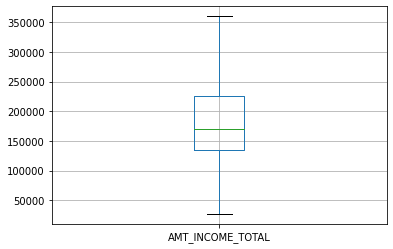

In [ ]:
merged_data.boxplot('AMT_INCOME_TOTAL')

### 3.1.2) Number of Children

In [ ]:
mx,mn = dropOL('CNT_CHILDREN')

In [ ]:
merged_data.drop(merged_data[merged_data.CNT_CHILDREN > mx].index,inplace=True)

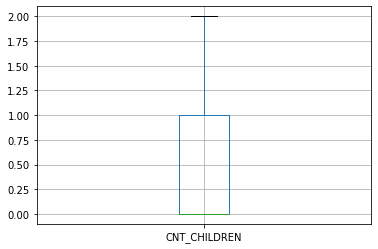

In [ ]:
merged_data.boxplot('CNT_CHILDREN')

### 3.1.3) Family Members

In [ ]:
mx,mn = dropOL('CNT_FAM_MEMBERS')

In [ ]:
merged_data.drop(merged_data[merged_data.CNT_FAM_MEMBERS > mx].index,inplace=True)

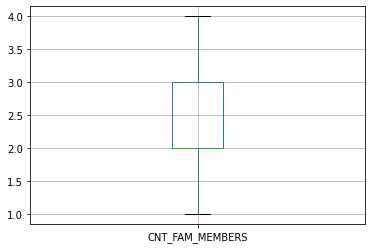

In [ ]:
merged_data.boxplot('CNT_FAM_MEMBERS')

### 3.1.3) Days Employed

In [ ]:
mx,mn = dropOL('DAYS_EMPLOYED')

In [ ]:
merged_data.drop(merged_data[merged_data.DAYS_EMPLOYED < mn].index,inplace=True)

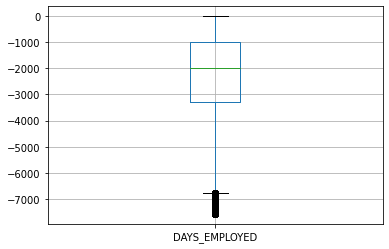

In [ ]:
merged_data.boxplot('DAYS_EMPLOYED')

## 3.2) Pre-Processing Data Kategorikal

In [ ]:
merged_data.describe(include='object').T

count unique                            top    freq
CODE_GENDER          385129      2                              F  238536
FLAG_OWN_CAR         385129      2                              N  221736
FLAG_OWN_REALTY      385129      2                              Y  245901
NAME_INCOME_TYPE     385129      5                        Working  241808
NAME_EDUCATION_TYPE  385129      5  Secondary / secondary special  260594
NAME_FAMILY_STATUS   385129      5                        Married  273623
NAME_HOUSING_TYPE    385129      6              House / apartment  339741
OCCUPATION_TYPE      385129     18                       Laborers   97643

In [ ]:
merged_data_cat = merged_data.select_dtypes(include=["object"])

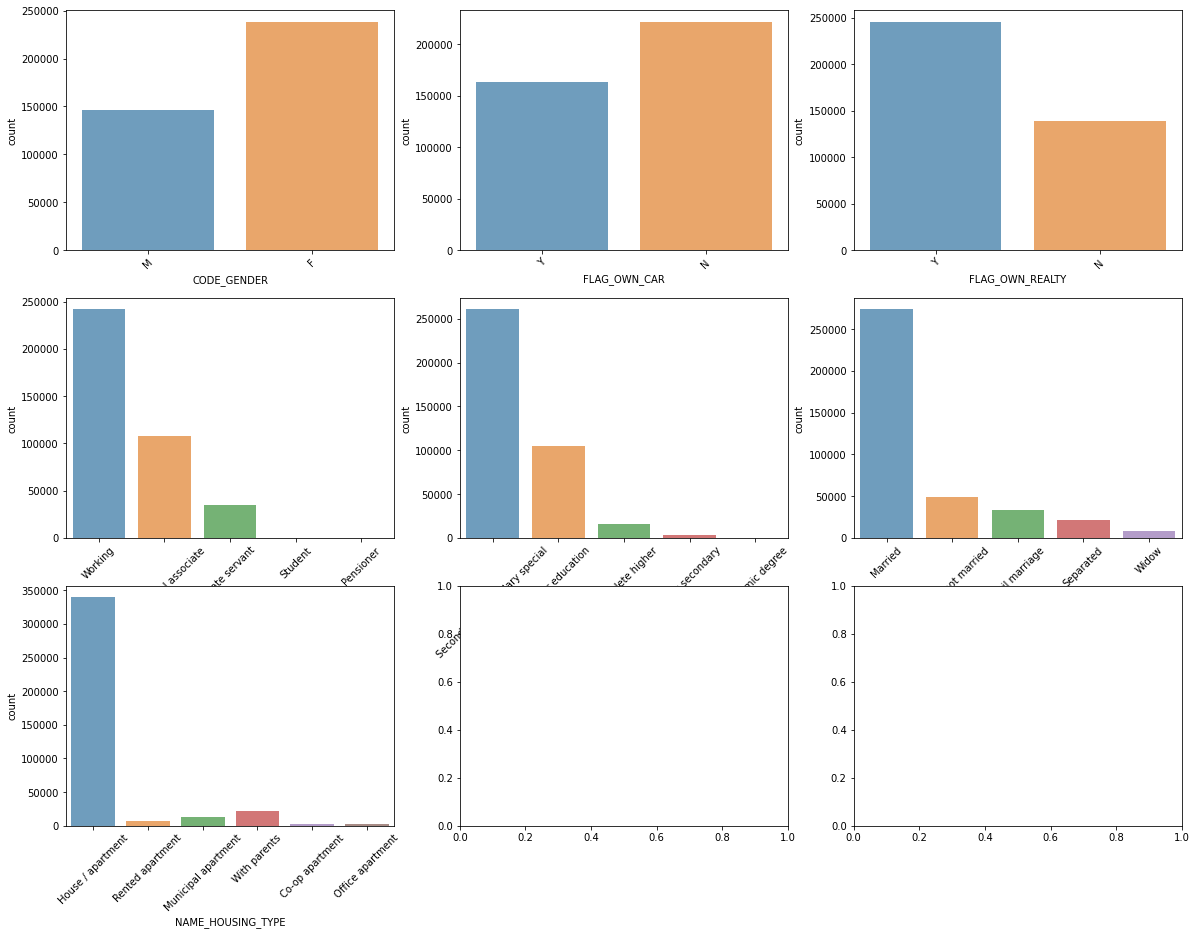

In [ ]:
# magma
fig, axes = plt.subplots(
    round(len(merged_data_cat.columns) / 3), 3, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(merged_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=merged_data_cat.columns[i], alpha=0.7, data=merged_data_cat, ax=ax)

Drop kolom name_housing_type karena nilainya konstan (hanya berpusat di 1 jenis saja)

In [ ]:
merged_data_cat.drop(columns = ['NAME_HOUSING_TYPE'],inplace=True)

In [ ]:
merged_data_cat.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'],
      dtype='object')

## 3.3) Pre-Processing Data Numerikal

In [ ]:
merged_data.describe().T

count           mean           std      min       25%  \
CNT_CHILDREN      385129.0       0.481028      0.696279      0.0       0.0   
AMT_INCOME_TOTAL  385129.0  180929.135627  71454.424669  27000.0  135000.0   
DAYS_BIRTH        385129.0  -14817.669158   3390.520362 -24449.0  -17329.0   
DAYS_EMPLOYED     385129.0   -2352.788920   1729.995807  -7566.0   -3292.0   
FLAG_WORK_PHONE   385129.0       0.280716      0.449350      0.0       0.0   
FLAG_PHONE        385129.0       0.289249      0.453414      0.0       0.0   
FLAG_EMAIL        385129.0       0.101745      0.302313      0.0       0.0   
CNT_FAM_MEMBERS   385129.0       2.278143      0.857641      1.0       2.0   
STATUS            385129.0       0.019292      0.137550      0.0       0.0   

                       50%       75%       max  
CNT_CHILDREN           0.0       1.0       2.0  
AMT_INCOME_TOTAL  173250.0  225000.0  360000.0  
DAYS_BIRTH        -14577.0  -12022.0   -7705.0  
DAYS_EMPLOYED      -1993.0    -984.0     -17.0  
FLAG_WORK_PHONE        0.0       1.0       1.0  
FLAG_PHONE             0.0       1.0       1.0  
FLAG_EMAIL             0.0       0.0       1.0  
CNT_FAM_MEMBERS        2.0       3.0       4.0  
STATUS                 0.0       0.0       1.0

In [ ]:
merged_data_num = merged_data.select_dtypes(exclude=["object"])

In [ ]:
merged_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385129 entries, 0 to 435499
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CNT_CHILDREN      385129 non-null  int64  
 1   AMT_INCOME_TOTAL  385129 non-null  float64
 2   DAYS_BIRTH        385129 non-null  int64  
 3   DAYS_EMPLOYED     385129 non-null  int64  
 4   FLAG_WORK_PHONE   385129 non-null  int64  
 5   FLAG_PHONE        385129 non-null  int64  
 6   FLAG_EMAIL        385129 non-null  int64  
 7   CNT_FAM_MEMBERS   385129 non-null  float64
 8   STATUS            385129 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 37.4 MB


Feature Engineering Data Numerikal

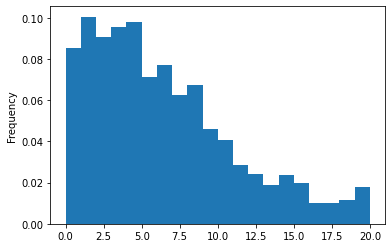

In [ ]:
# Mengubah kolom days employed menjadi working years
merged_data_num['WORKING_YEARS']=-(merged_data_num['DAYS_EMPLOYED'])//365	
merged_data_num[merged_data_num['WORKING_YEARS']<0] = np.nan # replace by na
merged_data_num['DAYS_EMPLOYED']
merged_data_num['WORKING_YEARS'].fillna(merged_data_num['WORKING_YEARS'].mean(),inplace=True) #replace na by mean
merged_data_num['WORKING_YEARS'].plot(kind='hist',bins=20,density=True)

(20.953999999999997, 25.5]    0.028990
(25.5, 30.0]                  0.150775
(30.0, 34.5]                  0.143892
(34.5, 39.0]                  0.178125
(39.0, 43.5]                  0.146870
(43.5, 48.0]                  0.144271
(48.0, 52.5]                  0.095745
(52.5, 57.0]                  0.074040
(57.0, 61.5]                  0.027853
(61.5, 66.0]                  0.009438
Name: AGE, dtype: float64


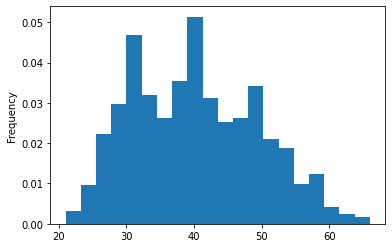

In [ ]:
# Mengubah kolom days_birth menjadi age
merged_data_num['AGE']=-(merged_data_num['DAYS_BIRTH'])//365	
print(merged_data_num['AGE'].value_counts(bins=10,normalize=True,sort=False))
merged_data_num['AGE'].plot(kind='hist',bins=20,density=True)



In [ ]:
# Drop kolom original (Days_Birth dan Days_Employed)
merged_data_num.drop(columns = ['DAYS_BIRTH'],inplace=True)
merged_data_num.drop(columns = ['DAYS_EMPLOYED'],inplace=True)

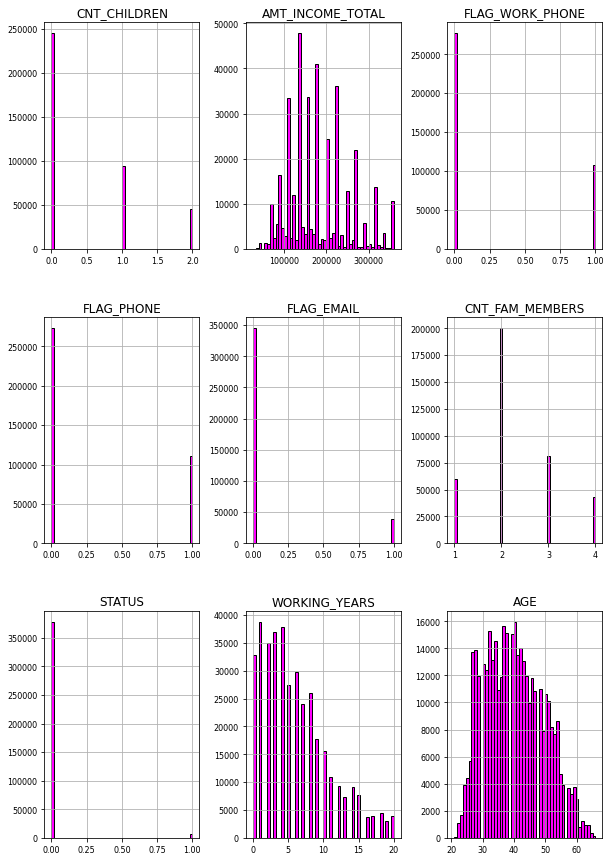

In [ ]:
# Plot the distribution 
fig_ = merged_data_num.hist(
    figsize=(10, 15), 
    bins=50, 
    color="magenta", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

Drop kolom yang tidak memberikan informasi pada model : FLAG_EMAIL, FLAG_PHONE dan FLAG_WORK_PHONE

In [ ]:
merged_data_num.drop(columns = ['FLAG_EMAIL'],inplace=True)
merged_data_num.drop(columns = ['FLAG_PHONE'],inplace=True)
merged_data_num.drop(columns = ['FLAG_WORK_PHONE'],inplace=True)

In [ ]:
# Membuat correlation matrix
pd.options.display.float_format = "{:,.2f}".format
corr_matrix = merged_data_num.corr()
corr_matrix

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  STATUS  \
CNT_CHILDREN              1.00             -0.01             0.89   -0.01   
AMT_INCOME_TOTAL         -0.01              1.00            -0.03    0.00   
CNT_FAM_MEMBERS           0.89             -0.03             1.00   -0.01   
STATUS                   -0.01              0.00            -0.01    1.00   
WORKING_YEARS             0.00              0.04             0.02   -0.02   
AGE                      -0.29              0.03            -0.23   -0.01   

                  WORKING_YEARS   AGE  
CNT_CHILDREN               0.00 -0.29  
AMT_INCOME_TOTAL           0.04  0.03  
CNT_FAM_MEMBERS            0.02 -0.23  
STATUS                    -0.02 -0.01  
WORKING_YEARS              1.00  0.21  
AGE                        0.21  1.00

In [ ]:
corr_matrix[(corr_matrix < 0.30) & (corr_matrix > -0.30)] = 0
corr_matrix

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  STATUS  \
CNT_CHILDREN              1.00              0.00             0.89    0.00   
AMT_INCOME_TOTAL          0.00              1.00             0.00    0.00   
CNT_FAM_MEMBERS           0.89              0.00             1.00    0.00   
STATUS                    0.00              0.00             0.00    1.00   
WORKING_YEARS             0.00              0.00             0.00    0.00   
AGE                       0.00              0.00             0.00    0.00   

                  WORKING_YEARS  AGE  
CNT_CHILDREN               0.00 0.00  
AMT_INCOME_TOTAL           0.00 0.00  
CNT_FAM_MEMBERS            0.00 0.00  
STATUS                     0.00 0.00  
WORKING_YEARS              1.00 0.00  
AGE                        0.00 1.00

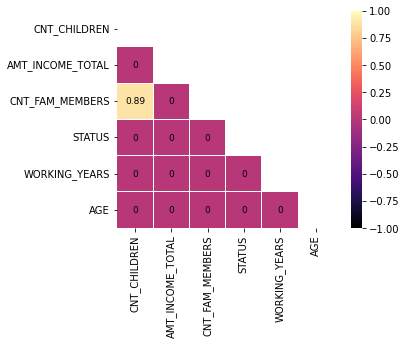

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 


cmap = "magma"

# plot the heatmap
sns.heatmap( 
    data = corr_matrix, 
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0, 
    vmin = -1.0, 
    linewidths = 0.1,
    annot_kws = {
        "size": 9, 
        "color": "black"
    }, 
    square = True, 
    cmap = cmap, 
    annot = True
);

In [ ]:
merged_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385129 entries, 0 to 435499
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CNT_CHILDREN      385129 non-null  float64
 1   AMT_INCOME_TOTAL  385129 non-null  float64
 2   CNT_FAM_MEMBERS   385129 non-null  float64
 3   STATUS            385129 non-null  float64
 4   WORKING_YEARS     385129 non-null  float64
 5   AGE               385129 non-null  float64
dtypes: float64(6)
memory usage: 28.6 MB


In [ ]:
status_corr = merged_data_num.corr()["STATUS"]
status_corr.abs().sort_values(ascending=False)[1:]

WORKING_YEARS      0.02
AGE                0.01
CNT_FAM_MEMBERS    0.01
CNT_CHILDREN       0.01
AMT_INCOME_TOTAL   0.00
Name: STATUS, dtype: float64

## 3.4) Data Visualization

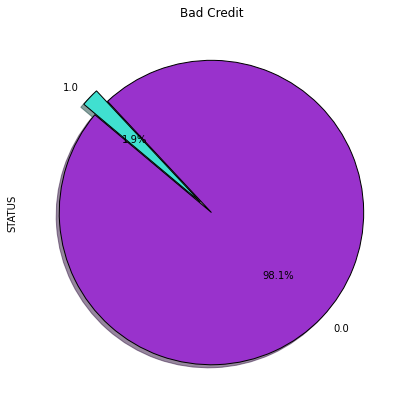

In [ ]:
# Proporsi Bad Credit

Proporsi_Bad_Credit = merged_data_num['STATUS']

explode = [0, 0.1]

merged_data_num["STATUS"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Bad Credit');

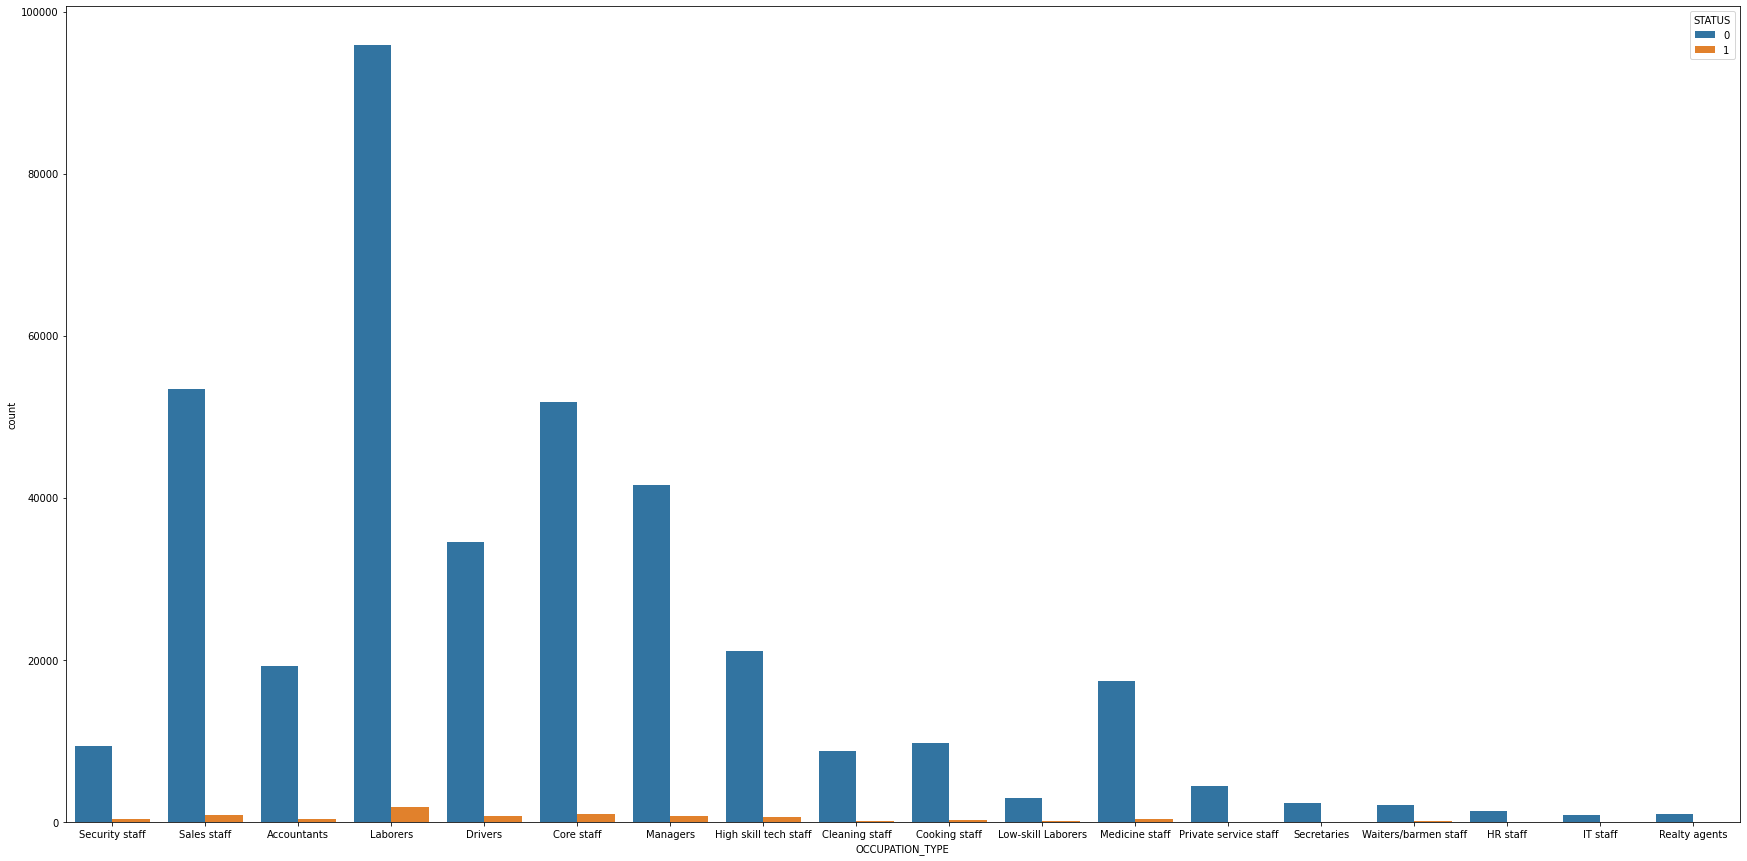

In [ ]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x="OCCUPATION_TYPE", hue="STATUS", data=merged_data)

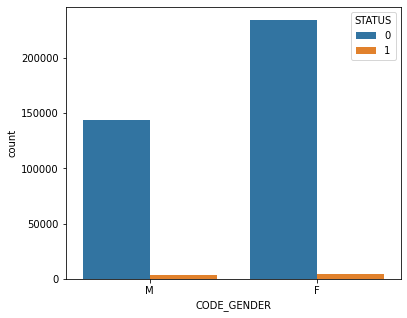

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="CODE_GENDER", hue="STATUS", data=merged_data)

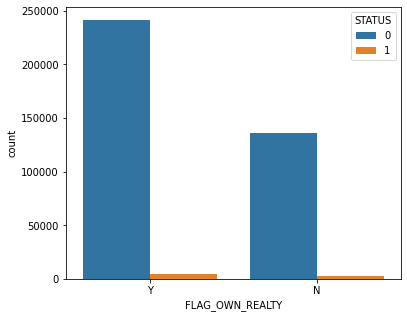

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="FLAG_OWN_REALTY", hue="STATUS", data=merged_data)

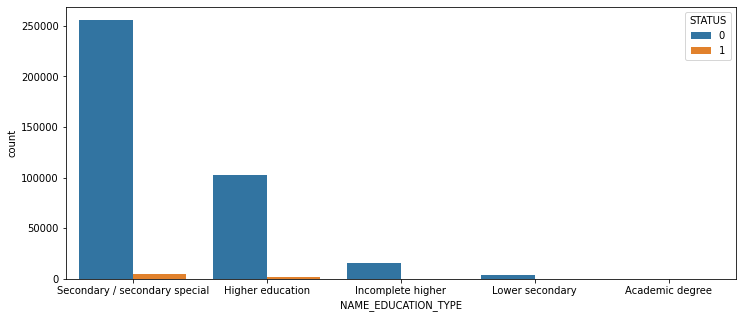

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="NAME_EDUCATION_TYPE", hue="STATUS", data=merged_data)

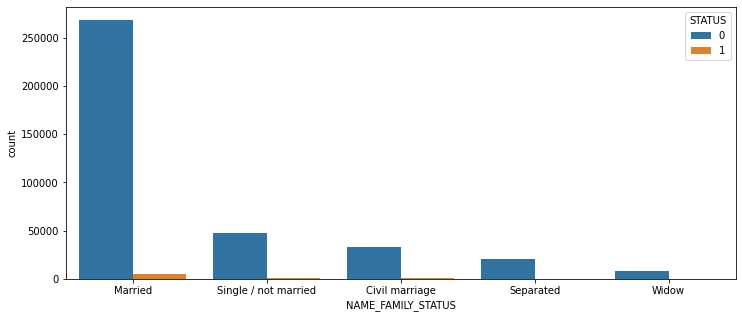

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="NAME_FAMILY_STATUS", hue="STATUS", data=merged_data)

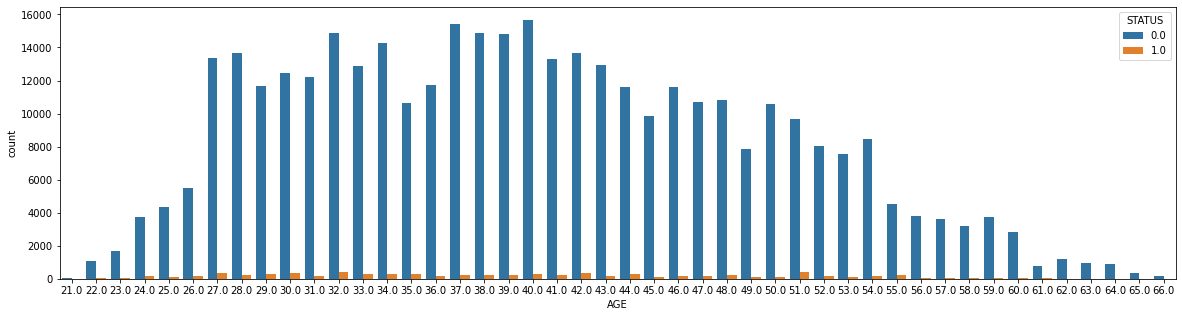

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="AGE", hue="STATUS", data=merged_data_num)

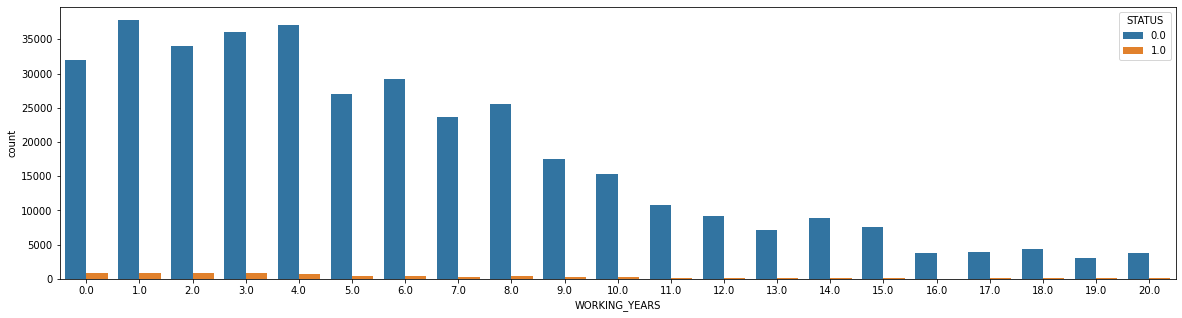

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x="WORKING_YEARS", hue="STATUS", data=merged_data_num)

In [ ]:
import plotly.express as px
px.histogram(merged_data_num, x='AMT_INCOME_TOTAL', color ='STATUS')

# 4) Modelling

In [ ]:
df_model = merged_data_num.join(merged_data_cat)
df_model.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'STATUS',
       'WORKING_YEARS', 'AGE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'],
      dtype='object')

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385129 entries, 0 to 435499
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CNT_CHILDREN         385129 non-null  float64
 1   AMT_INCOME_TOTAL     385129 non-null  float64
 2   CNT_FAM_MEMBERS      385129 non-null  float64
 3   STATUS               385129 non-null  float64
 4   WORKING_YEARS        385129 non-null  float64
 5   AGE                  385129 non-null  float64
 6   CODE_GENDER          385129 non-null  object 
 7   FLAG_OWN_CAR         385129 non-null  object 
 8   FLAG_OWN_REALTY      385129 non-null  object 
 9   NAME_INCOME_TYPE     385129 non-null  object 
 10  NAME_EDUCATION_TYPE  385129 non-null  object 
 11  NAME_FAMILY_STATUS   385129 non-null  object 
 12  OCCUPATION_TYPE      385129 non-null  object 
dtypes: float64(6), object(7)
memory usage: 49.2+ MB


In [ ]:
df_model.isna()

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  STATUS  \
0              False             False            False   False   
1              False             False            False   False   
2              False             False            False   False   
3              False             False            False   False   
4              False             False            False   False   
...              ...               ...              ...     ...   
435495         False             False            False   False   
435496         False             False            False   False   
435497         False             False            False   False   
435498         False             False            False   False   
435499         False             False            False   False   

        WORKING_YEARS    AGE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0               False  False        False         False            False   
1               False  False        False         False            False   
2               False  False        False         False            False   
3               False  False        False         False            False   
4               False  False        False         False            False   
...               ...    ...          ...           ...              ...   
435495          False  False        False         False            False   
435496          False  False        False         False            False   
435497          False  False        False         False            False   
435498          False  False        False         False            False   
435499          False  False        False         False            False   

        NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                  False                False               False   
1                  False                False               False   
2                  False                False               False   
3                  False                False               False   
4                  False                False               False   
...                  ...                  ...                 ...   
435495             False                False               False   
435496             False                False               False   
435497             False                False               False   
435498             False                False               False   
435499             False                False               False   

        OCCUPATION_TYPE  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
435495            False  
435496            False  
435497            False  
435498            False  
435499            False  

[385129 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
lst = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
ohe = OneHotEncoder()
ohe.fit(df_model[lst])

df_model_ohe_res = pd.DataFrame(ohe.transform(df_model[lst]).toarray(),
                          columns = ohe.get_feature_names_out())
df_model = pd.concat([df_model, df_model_ohe_res], axis = 1)
df_model.drop (columns = lst, inplace = True)
df_model.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  STATUS  WORKING_YEARS  \
0          0.00        112,500.00             2.00    0.00           3.00   
1          0.00        112,500.00             2.00    0.00           3.00   
2          0.00        112,500.00             2.00    0.00           3.00   
3          0.00        112,500.00             2.00    0.00           3.00   
4          0.00        112,500.00             2.00    0.00           3.00   

    AGE  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  FLAG_OWN_CAR_Y  ...  \
0 58.00           0.00           1.00            0.00            1.00  ...   
1 58.00           0.00           1.00            0.00            1.00  ...   
2 58.00           0.00           1.00            0.00            1.00  ...   
3 58.00           0.00           1.00            0.00            1.00  ...   
4 58.00           0.00           1.00            0.00            1.00  ...   

   OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Low-skill Laborers  \
0                      0.00                                0.00   
1                      0.00                                0.00   
2                      0.00                                0.00   
3                      0.00                                0.00   
4                      0.00                                0.00   

   OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                      0.00                            0.00   
1                      0.00                            0.00   
2                      0.00                            0.00   
3                      0.00                            0.00   
4                      0.00                            0.00   

   OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                   0.00                           0.00   
1                                   0.00                           0.00   
2                                   0.00                           0.00   
3                                   0.00                           0.00   
4                                   0.00                           0.00   

   OCCUPATION_TYPE_Sales staff  OCCUPATION_TYPE_Secretaries  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.00                         0.00   
3                         0.00                         0.00   
4                         0.00                         0.00   

   OCCUPATION_TYPE_Security staff  OCCUPATION_TYPE_Waiters/barmen staff  
0                            1.00                                  0.00  
1                            1.00                                  0.00  
2                            1.00                                  0.00  
3                            1.00                                  0.00  
4                            1.00                                  0.00  

[5 rows x 45 columns]

In [ ]:
df_model.isna()

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  STATUS  \
0              False             False            False   False   
1              False             False            False   False   
2              False             False            False   False   
3              False             False            False   False   
4              False             False            False   False   
...              ...               ...              ...     ...   
435495         False             False            False   False   
435496         False             False            False   False   
435497         False             False            False   False   
435498         False             False            False   False   
435499         False             False            False   False   

        WORKING_YEARS    AGE  CODE_GENDER_F  CODE_GENDER_M  FLAG_OWN_CAR_N  \
0               False  False          False          False           False   
1               False  False          False          False           False   
2               False  False          False          False           False   
3               False  False          False          False           False   
4               False  False          False          False           False   
...               ...    ...            ...            ...             ...   
435495          False  False           True           True            True   
435496          False  False           True           True            True   
435497          False  False           True           True            True   
435498          False  False           True           True            True   
435499          False  False           True           True            True   

        FLAG_OWN_CAR_Y  ...  OCCUPATION_TYPE_Laborers  \
0                False  ...                     False   
1                False  ...                     False   
2                False  ...                     False   
3                False  ...                     False   
4                False  ...                     False   
...                ...  ...                       ...   
435495            True  ...                      True   
435496            True  ...                      True   
435497            True  ...                      True   
435498            True  ...                      True   
435499            True  ...                      True   

        OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0                                    False                     False   
1                                    False                     False   
2                                    False                     False   
3                                    False                     False   
4                                    False                     False   
...                                    ...                       ...   
435495                                True                      True   
435496                                True                      True   
435497                                True                      True   
435498                                True                      True   
435499                                True                      True   

        OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False                                  False   
...                                ...                                    ...   
435495                            True                                   True   
435496                            True                              

In [ ]:
df_model.dropna(inplace=True)

In [ ]:
len(df_model.columns)

45

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340331 entries, 0 to 385128
Data columns (total 45 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CNT_CHILDREN                                       340331 non-null  float64
 1   AMT_INCOME_TOTAL                                   340331 non-null  float64
 2   CNT_FAM_MEMBERS                                    340331 non-null  float64
 3   STATUS                                             340331 non-null  float64
 4   WORKING_YEARS                                      340331 non-null  float64
 5   AGE                                                340331 non-null  float64
 6   CODE_GENDER_F                                      340331 non-null  float64
 7   CODE_GENDER_M                                      340331 non-null  float64
 8   FLAG_OWN_CAR_N                                     340331 non-null  float6

## 4.1) Splitting into data train, data test, data validation

In [ ]:
from sklearn.model_selection import train_test_split
X = df_model.drop(columns=['STATUS']).copy()
y = df_model['STATUS'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(len(X_train))
print(len(X_test))

272264
68067


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=20)
print(len(X_train))
print(len(X_test))
print(len(X_val))

238231
68067
34033


## 4.2) Fit Models and Scoring Functions

In [ ]:
# Fit models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Scoring Functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_train.value_counts()

0.00    234458
1.00      3773
Name: STATUS, dtype: int64

Dilakukan SMOTE untuk imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_smote.value_counts()

0.00    234458
1.00    234458
Name: STATUS, dtype: int64

### 4.2.1) Random Forest

In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf_smote = rf_smote.predict(X_test)

acc_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
conf = confusion_matrix(y_test, y_pred_rf_smote)
rf_report_smote = classification_report(y_test, y_pred_rf_smote)

print(f"Accuracy Score of Random Forest (Smote) is : {acc_rf_smote}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{rf_report_smote}")

Accuracy Score of Random Forest (Smote) is : 0.9167437965533959
Confusion Matrix : 
[[61785  5222]
 [  445   615]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     67007
         1.0       0.11      0.58      0.18      1060

    accuracy                           0.92     68067
   macro avg       0.55      0.75      0.57     68067
weighted avg       0.98      0.92      0.94     68067



### 4.2.2) Decision Tree

In [ ]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_smote = dt_smote.predict(X_test)

acc_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
conf = confusion_matrix(y_test, y_pred_dt_smote)
dt_report_smote = classification_report(y_test, y_pred_dt_smote)

print(f"Accuracy Score of Decision Tree (Smote) is : {acc_dt_smote}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{dt_report_smote}")

Accuracy Score of Decision Tree (Smote) is : 0.9165528082624473
Confusion Matrix : 
[[61775  5232]
 [  448   612]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     67007
         1.0       0.10      0.58      0.18      1060

    accuracy                           0.92     68067
   macro avg       0.55      0.75      0.57     68067
weighted avg       0.98      0.92      0.94     68067





### 4.2.3) Gradient Boosting

In [ ]:
gb_smote = GradientBoostingClassifier()
gb_smote.fit(X_smote, y_smote)

GradientBoostingClassifier()

In [ ]:
y_pred_gb_smote = gb_smote.predict(X_test)

acc_gb_smote = accuracy_score(y_test, y_pred_gb_smote)
conf = confusion_matrix(y_test, y_pred_gb_smote)
gb_report_smote = classification_report(y_test, y_pred_gb_smote)

print(f"Accuracy Score of GBoost (Smote) is : {acc_gb_smote}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{gb_report_smote}")

Accuracy Score of GBoost (Smote) is : 0.9245155508543054
Confusion Matrix : 
[[62676  4331]
 [  807   253]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     67007
         1.0       0.06      0.24      0.09      1060

    accuracy                           0.92     68067
   macro avg       0.52      0.59      0.53     68067
weighted avg       0.97      0.92      0.95     68067



### 4.2.4) Hyperparameter Tuning Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_smote, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
# Check accuracy

print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')



Train Accuracy - : 0.984
Test Accuracy - : 0.984


## 4.3) Feature Importance

<BarContainer object of 44 artists>

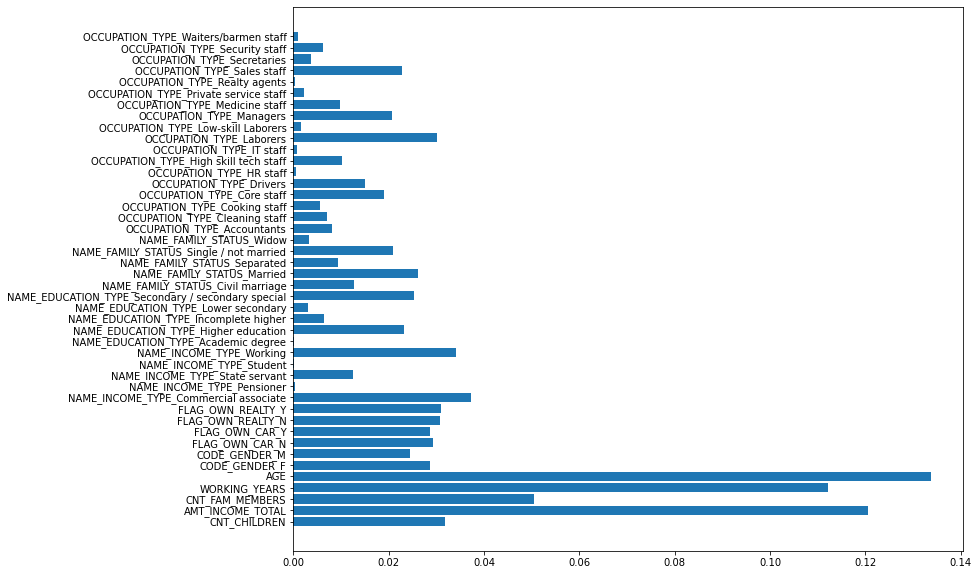

In [ ]:
# Plot the features importance for Random Forest
fi = rf_smote.feature_importances_
col = X_train.columns
plt.figure(figsize=(12,10))
plt.barh(col, fi)